**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ scipy 1.1.0

https://www.coursera.org/learn/stats-for-data-analysis/lecture/1RHyE/dovieritiel-nyie-intiervaly-dlia-dvukh-doliei

# Доверительные интервалы для двух долей 

In [3]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [4]:
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)

1.16.2
0.24.2
1.2.1


## Загрузка данных

In [5]:
data = pd.read_csv('banner_click_stat.txt', header = None, sep = '\t')
data.columns = ['banner_a', 'banner_b']

In [6]:
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [7]:
data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


## Интервальные оценки долей

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
conf_interval_banner_a = proportion_confint(sum(data.banner_a), 
                                            data.shape[0],
                                            method = 'wilson')
conf_interval_banner_b = proportion_confint(sum(data.banner_b), 
                                            data.shape[0],
                                            method = 'wilson')

In [9]:
print('interval for banner a [%f, %f]' % conf_interval_banner_a)
print('interval for banner b [%f, %f]' % conf_interval_banner_b)
#не пересекаются. сложно понять что лучше,  что хуже

interval for banner a [0.026961, 0.050582]
interval for banner b [0.040747, 0.068675]


### Как их сравнить?

## Доверительный интервал для разности долей (независимые выборки)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

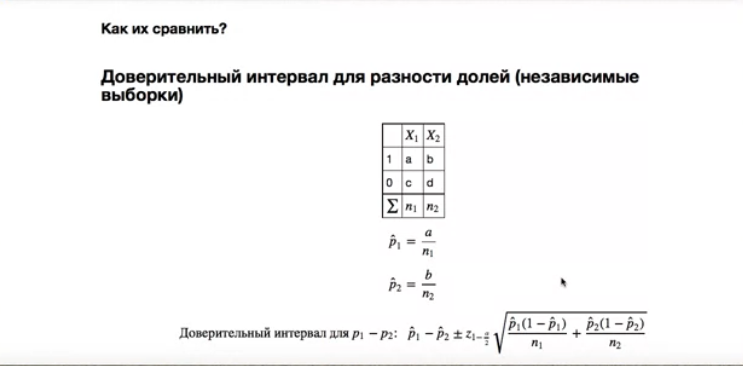

In [10]:
from IPython.display import Image
Image("две доли2.PNG")

In [11]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.) # находим z= 2F(z) - z -норм. распределелена 
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [12]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(data.banner_a, data.banner_b))

confidence interval: [-0.034157, 0.002157]


**Мы видим, что относительно 0 наш интервал более сильно сдвинут влево, большая часть его лежит все-таки в отрицательной плоскости, но тем не менее 0 внутри и не очень понятно, действительно ли старый баннер хуже, чем новый.**

## Доверительный интервал для разности долей (связанные выборки)

  $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

Для того, чтобы такую оценку получить, сначала нам нужно выписать таблицу сопряженности. Это очень простая таблица, у которой по строкам и по столбцам написаны значения наших случайных величин, в данном случае это 1 и 0, и в ячейках написано количество наблюдений, соответствующих данным значениям величин. Для того, чтобы получить доверительный интервал, нам с вами нужно по формулам рассчитать p1 и p2, дальше рассчитать их разность и подставить всё это для того, чтобы получить левую и правую границу. 

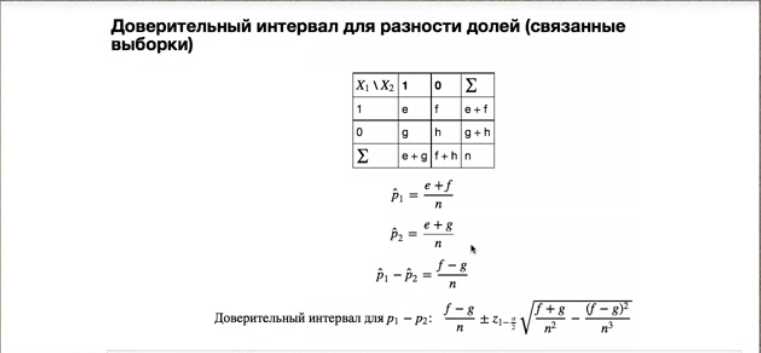

In [13]:
from IPython.display import Image
Image("две доли.PNG")

In [14]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [15]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_rel(data.banner_a, data.banner_b))

confidence interval: [-0.026689, -0.005311]


**. Отлично, смотрите: здесь мы видим, что весь наш интервал лежит полностью левее нуля (p1 меньше p2 при 95% точности) . Из этого можно сделать вывод, что действительно наш новый баннер лучше, чем старый**

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X∼N(μ,σ2) лежит в интервале μ±c⋅σ. Чему равно точное значение константы c? Округлите ответ до четырёх знаков после десятичной точки.

In [16]:
scipy.stats.norm.ppf(1-0.003/ 2.)

2.9677379253417944

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [17]:
p_asp=104/11037
p_plac=189/11034

In [18]:
p_asp-p_plac

-0.0077060239760047815

In [19]:
p_asp

0.009422850412249705

In [20]:
asp_int = proportion_confint(104, 11037, method = 'wilson')
plac_int = proportion_confint(189, 11034, method = 'wilson')

In [21]:
asp_int

(0.007783358288966079, 0.011403717226138864)

In [22]:
plac_int

(0.014870523663224692, 0.01972332878929014)

In [23]:
def proportions_confint_diff_ind(p1, count1, p2, count2, alpha = 0.05):    
    z = scipy.stats.norm.ppf (1 - alpha / 2.)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    
    return (left_boundary, right_boundary)

In [24]:
proportions_confint_diff_ind(p_asp,11037,p_plac,11034,alpha = 0.05)

(-0.010724297276960124, -0.004687750675049439)

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

In [109]:
diff = proportions_confint_diff_ind(p_plac, 11034, p_asp, 11037)
diff

(0.004687750675049439, 0.010724297276960124)

Продолжим анализировать данные эксперимента Гарвардской медицинской школы.
Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p/(1−p), которая называется шансами
(odds). Чтобы оценить шансы по выборке, вместо p нужно подставить p^. Например, шансы инфаркта в контрольной
группе, принимавшей плацебо, можно оценить как
189/(11034−189)≈0.0174
Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх
знаков после десятичной точки. 


In [27]:
a=p_plac/(1-p_plac)

In [28]:
b=p_asp/(1-p_asp)

In [29]:
a/b

1.8320539419087138

In [30]:
(p_plac/(1-p_plac))/(p_asp/(1-p_asp))

1.8320539419087138

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [99]:
asp_vect=np.append(np.ones(104),np.zeros(11037-104))

In [100]:
plac_vect=np.append(np.ones(189),np.zeros(11034-189))

In [134]:
np.random.seed(0)

In [135]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data))) 
    # генерим 1000 выборок размера исходных данных из индексов от 0 до лен дата
    samples = data[indices] 
    # получаем эти индексы, дальше получаем выборки, применяя эти индексы набору данных для отд. региона, и возвращаем выборки.
    return samples

In [136]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)]) 
    # 95% интевар. слева 2,5 и справа 97,5 квантили
    return boundaries

In [137]:
def odds(data):
    p = data.sum() / data.shape[0]
    return p / (1 - p)

In [138]:
odds_aspirin_data = list(map(odds, get_bootstrap_samples(asp_vect, 1000)))
odds_placebo_data = list(map(odds, get_bootstrap_samples(plac_vect, 1000)))

In [139]:
delta_odds_scores = list(map(lambda x: x[0] / x[1], zip(odds_placebo_data, odds_aspirin_data)))

In [140]:
stat_intervals(delta_odds_scores, 0.05)

array([1.44419465, 2.34321168])